### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Loading step

Synthetic Transactions: https://www.kaggle.com/ntnu-testimon/paysim1

In [3]:
dataset = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')
dataset = dataset.loc[dataset['type'] != 'PAYMENT']

### Sample the data

In [4]:
trainset = dataset.sample(frac=0.05)
testset = dataset.sample(frac=0.05)

### Train dataset information

In [5]:
train_qtd = trainset.shape[0]
train_fraud_qtd = len(list(filter(lambda x: x == 1, trainset['isFraud'])))
train_nonfraud_qtd = len(list(filter(lambda x: x == 0, trainset['isFraud'])))
train_proportion = train_fraud_qtd / train_qtd

print('train_total:', train_qtd)
print('train_fraud:', train_fraud_qtd)
print('train_nonfraud', train_nonfraud_qtd)
print('train_fraud proportion', train_proportion)
trainset.head()

train_total: 210556
train_fraud: 408
train_nonfraud 210148
train_fraud proportion 0.0019377267805239461


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1747028,161,CASH_OUT,118209.40,C1522608603,0.00,0.00,C456075977,690922.40,742330.88,0,0
2449391,203,CASH_OUT,150212.02,C351881732,356207.65,205995.63,C1805119187,425648.07,575860.09,0,0
2696249,211,CASH_IN,355525.06,C1671434444,8836360.52,9191885.58,C2085217761,469856.28,114331.22,0,0
514581,20,CASH_OUT,135327.72,C671686460,57.00,0.00,C1563134914,0.00,0.00,0,0
192670,13,CASH_IN,184233.75,C2024138076,73845.92,258079.66,C108202798,351.94,0.00,0,0


### Test dataset information

In [6]:
test_qtd = testset.shape[0]
test_fraud_qtd = len(list(filter(lambda x: x == 1, testset['isFraud'])))
test_nonfraud_qtd = len(list(filter(lambda x: x == 0, testset['isFraud'])))
test_proportion = test_fraud_qtd / test_qtd

print('test_total:', test_qtd)
print('test_fraud:', test_fraud_qtd)
print('test_nonfraud', test_nonfraud_qtd)
print('test_fraud proportion', test_proportion)
testset.head()

test_total: 210556
test_fraud: 392
test_nonfraud 210164
test_fraud proportion 0.0018617374950132032


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4245278,306,CASH_OUT,145067.13,C916516206,52062.00,0.00,C1825814788,2119159.51,2264226.65,0,0
173078,12,CASH_OUT,570109.01,C244985976,886.00,0.00,C564186091,0.00,529806.79,0,0
4358661,309,CASH_OUT,79517.75,C167101886,0.00,0.00,C439863039,374023.28,453541.03,0,0
6262076,610,CASH_OUT,100841.69,C1579233190,12593.00,0.00,C735508493,0.00,100841.69,0,0
4120631,302,CASH_IN,66891.82,C861376764,18836400.07,18903291.88,C261133851,6927431.08,6860539.27,0,0


### Labs

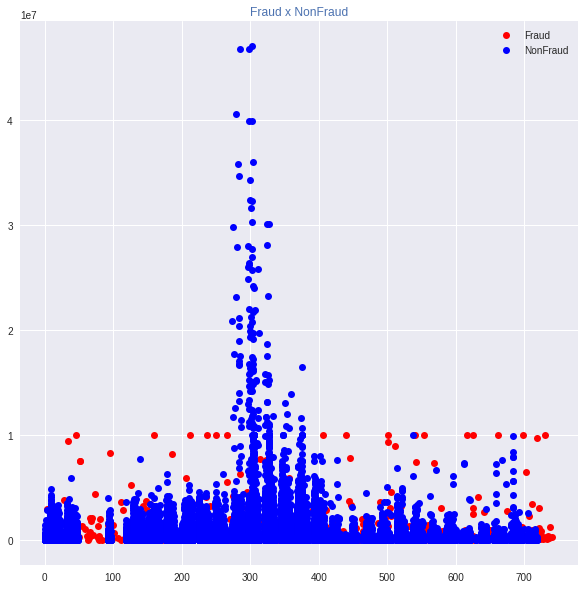

In [7]:
def plot(x_fraud, y_fraud, x_nonfraud, y_nonfraud):
    mpl.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_title('Fraud x NonFraud', color='C0')

    ax.plot(x_fraud, y_fraud, 'ro', label='Fraud')
    ax.plot(x_nonfraud, y_nonfraud, 'bo', label='NonFraud')
    ax.legend()
    
train_frauds = trainset.loc[trainset['isFraud'] == 1]
train_non_frauds = trainset.loc[trainset['isFraud'] == 0]

x_fraud = train_frauds[['step']]
y_fraud = train_frauds[['amount']]

x_nonfraud = train_non_frauds[['step']]
y_nonfraud = train_non_frauds[['amount']]

plot(x_fraud, y_fraud, x_nonfraud, y_nonfraud)